# Example Usage
This example shows how DensityX can be used to calculate the density of multiple glass compositions.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import densityx

In [4]:
# Load in Test Dataset
test_data = pd.read_excel("../../tests/test-data.xlsx", header=0)

# Check test_data has correct columns
test_data.head()

Sample_ID       SiO2      TiO2      Al2O3  Fe2O3        FeO        MgO  \
0  samp. NS-115  40.300000  0.560000  16.240000    NaN   5.590000   0.730000   
1  samp. NS-115  45.600000  3.630000  15.970000    NaN   9.480000   4.280000   
2  samp. NS-115  46.560000  2.180000  14.330000    NaN  10.620000  12.040000   
3  samp. NS-115  47.830000  2.280000  19.910000    NaN   7.400000   3.180000   
4  samp. NS-115  52.902262  0.580352  13.177704    NaN   7.022362  12.152315   

         CaO       Na2O       K2O  H2O     P     T  
0  18.740000  12.230000  5.220000    0  5000  1100  
1  15.680000   3.320000  0.320000    0  5000  1100  
2  10.030000   2.810000  0.640000    0  5000  1100  
3   7.340000   6.610000  3.120000    0  5000  1100  
4  11.602033   2.239217  0.323754    0  5000  1100

In [5]:
# Calculate Density
test_densities = densityx.Density(test_data, verbose=True)

# Check test_densities columns
test_densities.head()

Sample_ID       SiO2      TiO2      Al2O3  Fe2O3        FeO        MgO  \
0  samp. NS-115  40.300000  0.560000  16.240000    0.0   5.590000   0.730000   
1  samp. NS-115  45.600000  3.630000  15.970000    0.0   9.480000   4.280000   
2  samp. NS-115  46.560000  2.180000  14.330000    0.0  10.620000  12.040000   
3  samp. NS-115  47.830000  2.280000  19.910000    0.0   7.400000   3.180000   
4  samp. NS-115  52.902262  0.580352  13.177704    0.0   7.022362  12.152315   

         CaO       Na2O       K2O  ...  AbsError_K2O  AbsError_MgO  \
0  18.740000  12.230000  5.220000  ...      0.032537      0.034532   
1  15.680000   3.320000  0.320000  ...      0.001974      0.200368   
2  10.030000   2.810000  0.640000  ...      0.003742      0.534227   
3   7.340000   6.610000  3.120000  ...      0.020074      0.155271   
4  11.602033   2.239217  0.323754  ...      0.001845      0.525458   

   AbsError_Na2O  AbsError_SiO2  AbsError_Sum  AbsError_TiO2  \
0       0.074199       0.123639      0.973390       0.003063   
1       0.019934       0.138452      1.019456       0.019650   
2       0.015991       0.133987      1.152127       0.011185   
3       0.041394       0.151466      0.833385       0.012873   
4       0.012418       0.148356      1.139317       0.002902   

   density_g_per_cm  density_unc_g_per_cm  density_g_per_L  \
0          2.639029              0.039194      2639.029401   
1          2.765265              0.044050      2765.264907   
2          2.789576              0.052490      2789.576072   
3          2.626288              0.032995      2626.287725   
4          2.707294              0.051285      2707.294231   

   uncertainty_g_per_L  
0            39.193979  
1            44.050046  
2            52.489656  
3            32.995359  
4            51.285103  

[5 rows x 81 columns]

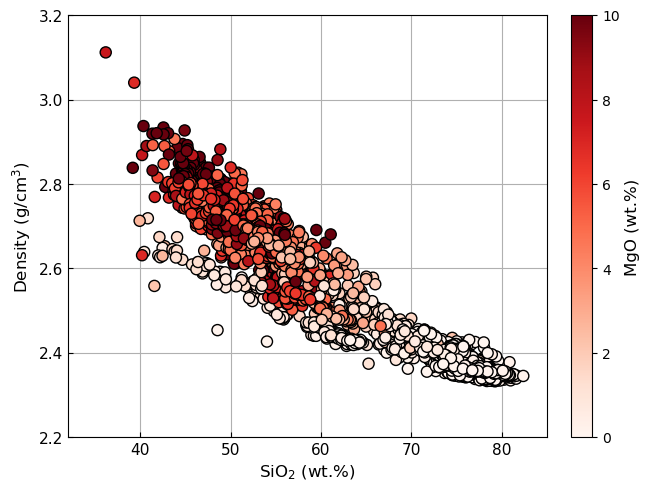

In [ ]:
# Plot SiO2 against Density
fs = 12

plt.figure(constrained_layout=True)

plt.grid()

sc = plt.scatter(test_densities["Norm_SiO2"], test_densities["density_g_per_cm"],
                 c=test_densities["Norm_MgO"], cmap="Reds", edgecolor='k', vmax=10, zorder=2, s=64)

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label("MgO (wt.%)", fontsize=fs)

# Set axis limits
plt.xlim(32, 85)
plt.ylim(2.2, 3.2)

# Adjust ticks
plt.tick_params(tickdir="in", labelsize=fs-1)

# Set labels
plt.xlabel("SiO$_2$ (wt.%)", fontsize=fs)
plt.ylabel("Density (g/cm$^3$)", fontsize=fs)

plt.show()